In [2]:
%matplotlib inline
import torch
import random
from d2l import torch as d2l

In [89]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, size = (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y
true_w = torch.tensor([1.0, 3])
true_b = 1.2
features, labels = synthetic_data(true_w, true_b, 1000)

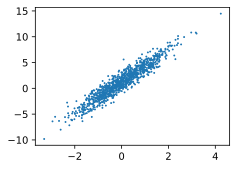

In [90]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),
               labels.detach().numpy(), 1)

In [86]:
def data_iter(batch_size, features, labels):
        num_examples = len(features)
        indices = list(range(num_examples))
        random.shuffle(indices)
        
        for i in range(0, num_examples, batch_size):
            batch_indices = indices[i:min(i + batch_size, num_examples)]
            yield features[batch_indices], labels[batch_indices]
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.6188,  2.1928],
        [ 0.2714,  1.6700],
        [-0.2053, -0.9084],
        [ 2.0783, -1.0499],
        [-2.0131,  1.2138],
        [-0.1245, -0.0726],
        [ 0.0982, -0.1606],
        [ 0.3323, -1.9827],
        [-0.1931,  1.3382],
        [ 0.0035,  1.5391]]) 
 tensor([ 6.1439,  6.4647, -1.7313,  0.1109,  2.8274,  0.8594,  0.8308, -4.3911,
         5.0227,  5.8046])


In [101]:
w = torch.normal(0, 1, size=(2,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [70]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [94]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [97]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [125]:
lr = 0.000010
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch+1}, loss {float(train_l.mean()):f}')

epoch1, loss 0.000052
epoch2, loss 0.000052
epoch3, loss 0.000052
epoch4, loss 0.000052
epoch5, loss 0.000052
epoch6, loss 0.000052
epoch7, loss 0.000052
epoch8, loss 0.000052
epoch9, loss 0.000052
epoch10, loss 0.000052


In [126]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([5.6446e-05, 0.0000e+00], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0002], grad_fn=<RsubBackward1>)
